# Brown Marmorated Stink Bug (BMSB) Risk Analysis in Minnesota: Accuracy Assessment

Contributors: Mattie Gisselbeck and Luke Zaruba

Description: This notebook assess the accuracy and validity of the spatial interaction models (Huff Model, Huff Model with Distance Decay, and Gravity Model). It also provides an interpretation of the accuracy and validity of the spatial interaction models at the end. 

Last Updated: March 26, 2024 

### 0. Import Packages

In [41]:
# Import Packages
import os
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score
import warnings

### 1. Read Model Input and Model Results

In [42]:
# Read Model Input CSV
model_input_df = pd.read_csv("/Users/mattiegisselbeck/Documents/GitHub/minnesota-bmsb-analysis/data/model/cities.csv")

# Read Model Results CSVs
hm_df = pd.read_csv("/Users/mattiegisselbeck/Documents/GitHub/minnesota-bmsb-analysis/data/model/results/final_huff.csv")
hm_dd_df = pd.read_csv("/Users/mattiegisselbeck/Documents/GitHub/minnesota-bmsb-analysis/data/model/results/final_huff_decay.csv")
gm_df = pd.read_csv("/Users/mattiegisselbeck/Documents/GitHub/minnesota-bmsb-analysis/data/model/results/final_gravity.csv")

### 2. Clean Model Input and Model Results

In [43]:
# Rename Columns 
model_input_df = model_input_df[["cities_FEATURE_NA", "agg_observations_Point_Count"]].copy()

# Drop Columns
model_input_df.columns = ["City", "Observation Count"]

# Drop Columns / Set Assessmemt DataFrame for Each Model
hm_a_df = hm_df[["City", "Incoming"]].copy()
hm_dd_a_df = hm_dd_df[["City", "Incoming"]].copy()
gm_a_df = gm_df[["City", "Incoming"]].copy()

# Merge Results to Attributes for Each Model
hm_lrm = model_input_df.merge(hm_a_df, left_on="City", right_on="City")
hm_dd_lrm = model_input_df.merge(hm_dd_a_df, left_on="City", right_on="City")
gm_lrm = model_input_df.merge(gm_a_df, left_on="City", right_on="City")

### 3. Linear Regression Model

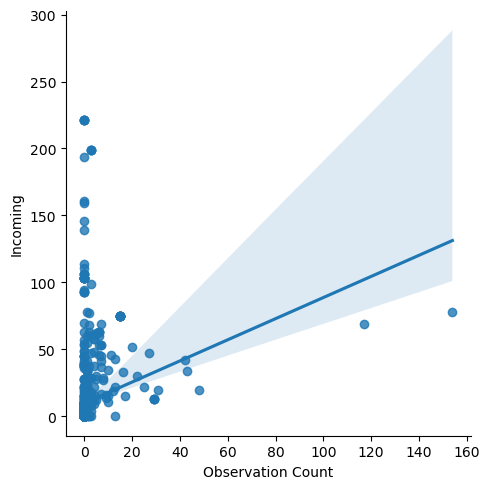

In [44]:
# Plot Linear Regression Model of Huff Model
sns.lmplot(data=hm_lrm, x="Observation Count", y="Incoming");

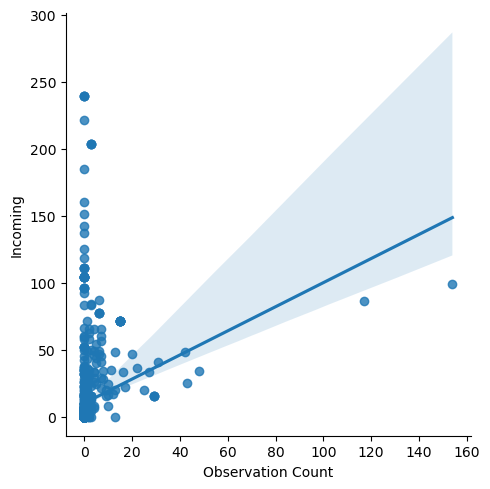

In [45]:
# Plot Linear Regression Model of Huff Model with Distance Decay
sns.lmplot(data=hm_dd_lrm, x="Observation Count", y="Incoming");

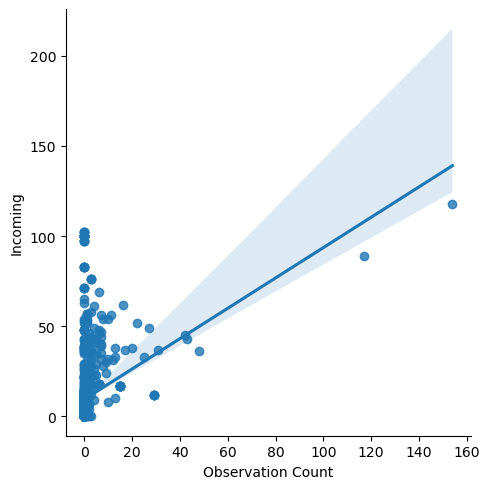

In [46]:
# Plot Linear Regression Model of Gravity Model
sns.lmplot(data=gm_lrm, x="Observation Count", y="Incoming");

### 3. Calculate Coefficient of Determination

In [47]:
# Calculate r2 for Huff Model
r2_score(hm_lrm["Observation Count"], hm_lrm["Incoming"])

-16.783797090421235

In [48]:
# Calculate r2 for Huff Model with Distance Decay
r2_score(hm_dd_lrm["Observation Count"], hm_dd_lrm["Incoming"])

-17.595876858510255

In [49]:
# Calculate r2 for Gravity Model
r2_score(gm_lrm["Observation Count"], gm_lrm["Incoming"])

-7.013110020929707

### 4. Calculate Correlation Coefficient(s)

#### 4.1. Huff Model

In [50]:
# Calculate Pearson Correlation Coefficient (r)
pcc = hm_lrm.corr(method="pearson", numeric_only=True).iloc[0, 1]
print("Pearson Correlation Coefficient (r):", pcc)

# Calculate Spearman's Rank Correlation Coefficient (ρ)
srcc = hm_lrm.corr(method="spearman", numeric_only=True).iloc[0, 1]
print("Spearman's Rank Correlation Coefficient (ρ):", srcc)

# Calculate Kendall Rank Correlation Coefficient (τb)
krcc = hm_lrm.corr(method="kendall", numeric_only=True).iloc[0, 1]
print("Kendall Rank Correlation Coefficient (τb):", krcc)

Pearson Correlation Coefficient (r): 0.19341474331577335
Spearman's Rank Correlation Coefficient (ρ): 0.5212296209963665
Kendall Rank Correlation Coefficient (τb): 0.4657155848351818


#### 4.2. Huff Model with Distance Decay

In [51]:
# Calculate Pearson Correlation Coefficient (r)
pcc = hm_dd_lrm.corr(method="pearson", numeric_only=True).iloc[0, 1]
print("Pearson Correlation Coefficient (r):", pcc)

# Calculate Spearman's Rank Correlation Coefficient (ρ)
srcc = hm_dd_lrm.corr(method="spearman", numeric_only=True).iloc[0, 1]
print("Spearman's Rank Correlation Coefficient (ρ):", srcc)

# Calculate Kendall Rank Correlation Coefficient (τb)
krcc = hm_dd_lrm.corr(method="kendall", numeric_only=True).iloc[0, 1]
print("Kendall Rank Correlation Coefficient (τb):", krcc)

Pearson Correlation Coefficient (r): 0.2145249699610488
Spearman's Rank Correlation Coefficient (ρ): 0.5299143828616187
Kendall Rank Correlation Coefficient (τb): 0.47540321567698396


#### 4.3. Gravity Model

In [52]:
# Calculate Pearson Correlation Coefficient (r)
pcc = gm_lrm.corr(method="pearson", numeric_only=True).iloc[0, 1]
print("Pearson Correlation Coefficient (r):", pcc)

# Calculate Spearman's Rank Correlation Coefficient (ρ)
srcc = gm_lrm.corr(method="spearman", numeric_only=True).iloc[0, 1]
print("Spearman's Rank Correlation Coefficient (ρ):", srcc)

# Calculate Kendall Rank Correlation Coefficient (τb)
krcc = gm_lrm.corr(method="kendall", numeric_only=True).iloc[0, 1]
print("Kendall Rank Correlation Coefficient (τb):", krcc)

Pearson Correlation Coefficient (r): 0.3160347597377355
Spearman's Rank Correlation Coefficient (ρ): 0.46523363670099305
Kendall Rank Correlation Coefficient (τb): 0.38825396045341715


--------------------------------------------------

## Interpretation

The Coefficient of Determination *R2* clearly performs worse than Pearson Correlation Coefficient *r* (shown in Table 1). However, by keeping in mind what they were designed to do and what exactly we are trying to measure, this makes sense. This assessment is comparing simulated presence counts compared to actual presence counts, meaning that the magnitudes should not line up because we are oversimulating observations to get a more general view of how presence exists across space, comparatively. Pearson's *r* naturally provides a better fit for this type of problem, because it is designed to measure correlation rather than actual error/fit. The whole point of the *R2* metric is to show the fit of the model, but this will not perform well in this specific context. In addition to using the Pearson Correlation Coefficient *r*, two other correlation metrics are used, namely the Spearman's Rank Correlation Coefficient and the Kendall Rank Correlation Coefficient, which both can take non-linear relationships into account. Together, these three measures of correlation can help show us just how reasonable and valid the model is.

The results are summarized below, with the best performing model for each metric highlighted in green.


Table 1. 


|     **Model**   |   **Pearson Correlation Coefficient**   |   **Spearman's Rank Correlation Coefficient**   |   **Kendall Rank Correlation Coefficient**   | **Coefficient of Determination**   |
| :-: | :-: | :-: | :-: | :-: |
| Huff Model ($\alpha$ = 1) | 0.1934 | 0.5212 | 0.4657 | -16.7837 |
| Huff Model with Distance Decay ($\alpha$ = 2) | 0.2145 | <span style="color:green">0.5299</span>  | <span style="color:green">0.4754</span> | -17.5958 |
| Gravity Model | <span style="color:green">0.3160</span> | 0.4652 | 0.3883 | -7.0131 |

Based on these results, it appears that the Huff Model using a distance decay parameter ($\alpha$) of 2 is the best performing all around, with it being the best for two of the three metrics. However, the Gravity Model performs much better than the other models, when only linear relationships are taken into account (i.e., through Pearson Correlation Coefficient *r*). Ultimately determining the "best" model comes down to whether we think the relationship between the variables should be linear or not. It is difficult, because the variables are showing two very different things. Just because there isn't currently a BMSB presence in a city, does not mean that there could not easily be, which is exaectly what the simulations are trying to model and capture. With that being said though, we believe that both the Huff Model with Distance Decay and the Gravity Model can be used to adequately model the phenomena and inform decision making regarding BMSB hazards, spread, and mitigation efforts.